<a href="https://colab.research.google.com/github/akshay-bahulikar/Machine_Learning/blob/master/MnistDataset_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist=keras.datasets.fashion_mnist #load dataset

(train_images,train_labels), (test_images,test_labels)=fashion_mnist.load_data() #split into training and testing

In [3]:
train_images.shape #60000 images made up of 28*28 pixels each

(60000, 28, 28)

In [13]:
train_images[0,23,23]

194

Given is the pixel value of th image and 23*23th pixel which lies between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.[link text](https://)

In [14]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

Our labels are integers ranging from 0-9. Each integer represents a specific article of clothing.

In [15]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] #create an array of label names to indicate which is which

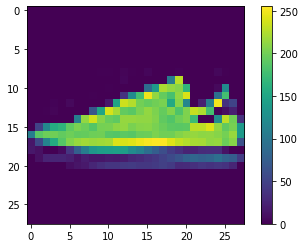

In [16]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.show()

**Data Preprocessing** 

We scale all our grayscale pixel values(0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0 which will make it easier for the model to process the values.



In [17]:
train_images=train_images/255.0
test_images=test_images/255.0

**Building the Model**

We are going to use a Keras sequential model with three different layers. This model represents a feed-forward neural network(one that passes the values from left to right).



In [18]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  #input layer (1)
    keras.layers.Dense(128,activation='relu'),  #input layer (2)
    keras.layers.Dense(10,activation='softmax')  #output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

**Compile the Model**



In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the Model**

In [24]:
model.fit(train_images,train_labels,epochs=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1833 - accuracy: 0.9312


**Evaluating the Model**


*   verbose = 0 , means silent
*   verbose = 1, which includes both progress bar and one line per epoch.
*   verbose = 2, which means one line per epoch i.e. epoch no./total no of epochs





In [25]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8907
Test Accuracy: 0.8906999826431274


**Making Predictions**

In [26]:
predictions=model.predict(test_images)

Coat


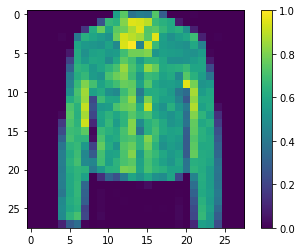

In [33]:
print(class_names[np.argmax(predictions[10])]) #argmax returns the indices of the maximum values along an axis.
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.show()

**Verifying Predictions**

A function to help us verify predictions with some simple visuals

Pick a number: 101
6


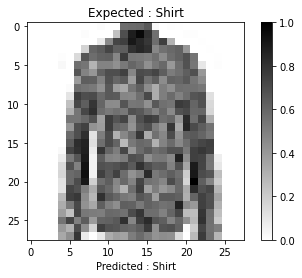

In [37]:
def predict(model,image,correct_label):
  class_names=['T-shirt/top','Trouser','Pullover','Dress',
               'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
  prediction=model.predict(np.array([image]))
  predicted_class=class_names[np.argmax(prediction)]

  show_image(image,class_names[correct_label],predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.title("Expected : "+label)
  plt.xlabel("Predicted : "+guess)
  plt.colorbar()
  plt.show()

def get_number():
  while True:
    num=input("Pick a number: ")
    if num.isdigit():
      num=int(num)
      if 0<=num<=1000:
        return int(num)
    else:
      print("Try again...")

num=get_number()
image=test_images[num]
label=test_labels[num]
print(label)
predict(model,image,label)